# Introducción a las redes neuronales profundas
# Proyecto 2 

Clasificar los vectores x1 y x2 usando backpropagation en una red neuronal shallow, para ello usar los siguientes métodos:

1. Usando SDBP
2. Método de momento
3. Método de Levenberg-Marquardt

In [33]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
%matplotlib inline

In [2]:
x1 = np.array([[-4,-3],[-4,-1],[-3,-3],[-3,-1],[-3,0],[-2,-2],[0,-1],[1,-1],[1,0],[1,2],
               [2,-1],[2,1],[2,2],[2,3],[2,4],[3,-4],[3,-3],[3,-2],[3,-1],[4,-1]])

x2 = np.array([[-1,-4],[-1,-3],[-1,2],[-1,3],[-1,4],[0,-4],[0,-3],[0,2],[1,-5],[1,-4],
               [1,4],[3,2],[3,3],[4,1],[4,2]])

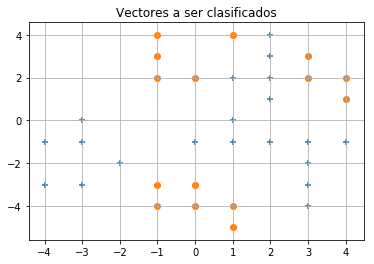

In [30]:
plt.scatter(x1[:,0], x1[:,1], marker='+')
plt.scatter(x2[:,0], x2[:,1], marker='o')
plt.title('Vectores a ser clasificados')
plt.grid(True)
plt.show()

In [51]:
X = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(20), np.ones(15)))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Método SDBP

In [285]:
net1 = Sequential()
net1.add(Dense(30, activation='tanh', input_shape=(2,)))
net1.add(Dense(30, activation='relu'))
net1.add(Dense(1, activation='sigmoid'))

In [286]:
net1.compile(optimizer=SGD(lr=0.01), 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

In [287]:
net1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 30)                90        
_________________________________________________________________
dense_96 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 31        
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


In [288]:
history1 = net1.fit(X, y, epochs=100, batch_size=1)

Epoch 1/100
35/35 [==============================] - 1s 26ms/step - loss: 0.7174 - acc: 0.4571
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6395 - acc: 0.6286
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 0.6045 - acc: 0.6286
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5808 - acc: 0.6286
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5602 - acc: 0.6857
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5421 - acc: 0.6857
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5281 - acc: 0.6857
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5116 - acc: 0.7714
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4989 - acc: 0.7429
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4859 - acc: 0.7429
Epoch 11/100
35/35 [==============================] - 0s 2

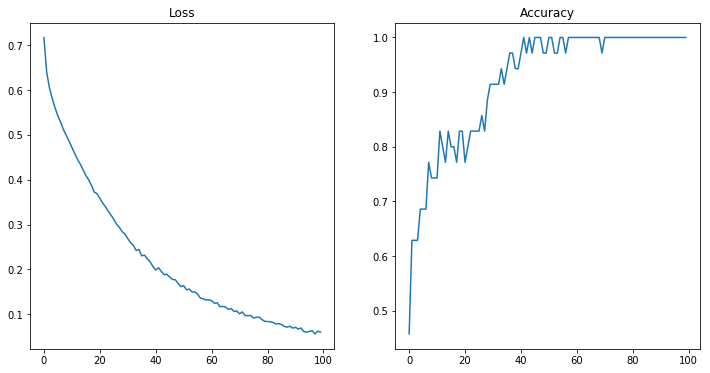

In [289]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history1.epoch, history1.history['loss'])
plt.title('Loss')
plt.subplot(122)
plt.plot(history1.epoch, history1.history['acc'])
plt.title('Accuracy')
plt.show()

In [290]:
steps = 500
xx, yy = np.meshgrid(np.linspace(-8, 8, steps), np.linspace(-8, 8, steps))

grid_prediction = np.round(net1.predict(np.hstack((xx.reshape(steps*steps, 1), yy.reshape(steps*steps, 1)))))
grid_prediction.shape = (steps, steps)

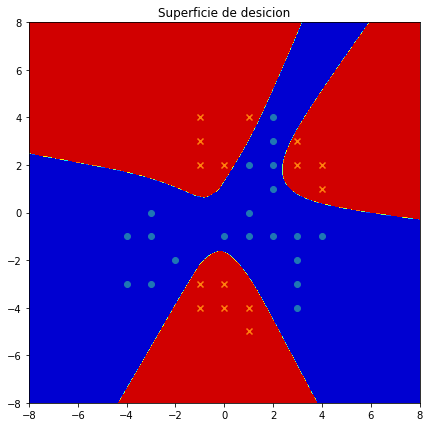

In [291]:
plt.figure(figsize=(7,7))
plt.contourf(xx, yy, grid_prediction>0.5, cmap='jet')
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1], marker='x')
plt.title('Superficie de desicion')
plt.show()

In [300]:
x = float(input('Coordenada x: '))
y = float(input('Coordenada y: '))
v = np.array([x, y]).reshape(1,2)
net1.predict(v)

Coordenada x:  0
Coordenada y:  0


array([[0.00717137]], dtype=float32)

### Método de momento

In [253]:
net2 = Sequential()
net2.add(Dense(30, activation='tanh', input_shape=(2,)))
net2.add(Dense(30, activation='relu'))
net2.add(Dense(1, activation='sigmoid'))

In [254]:
net2.compile(optimizer=SGD(lr=0.01, momentum=0.9), 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

In [255]:
history2 = net2.fit(X, y, epochs=50, batch_size=1, shuffle=True)

Epoch 1/50
35/35 [==============================] - 1s 21ms/step - loss: 0.7609 - acc: 0.4857
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5631 - acc: 0.6571
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.4765 - acc: 0.8286
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.3669 - acc: 0.8857
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4942 - acc: 0.8286
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 0.3026 - acc: 0.8286
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 0.3327 - acc: 0.8857
Epoch 8/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2308 - acc: 0.8857
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 0.2638 - acc: 0.8857
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 0.1717 - acc: 0.9429
Epoch 11/50
35/35 [==============================] - 0s 2ms/step - l

In [250]:
steps = 500
xx, yy = np.meshgrid(np.linspace(-8, 8, steps), np.linspace(-8, 8, steps))

grid_prediction = np.round(net2.predict(np.hstack((xx.reshape(steps*steps, 1), yy.reshape(steps*steps, 1)))))
grid_prediction.shape = (steps, steps)

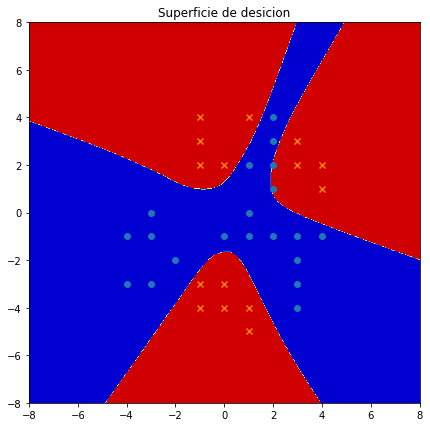

In [251]:
plt.figure(figsize=(7,7))
plt.contourf(xx, yy, grid_prediction>0.5, cmap='jet')
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1], marker='x')
plt.title('Superficie de desicion')
plt.show()

### Método de Levenberg-Marquardt